In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)


2.0.0
1.18.1


In [2]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4])
for line in ds:
    print(line)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [4]:
ds = tf.data.Dataset.from_tensors([1,2,3,4])
for line in ds:
    print(line)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [6]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensors(t)   # [[1, 2], [3, 4]]
for line in ds:
    print(line)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [10]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensors({"a":t,"b":t})   # [[1, 2], [3, 4]]
for line in ds:
    print(line)
    break

{'a': <tf.Tensor: id=46, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>, 'b': <tf.Tensor: id=47, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>}


In [11]:
t = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensor_slices({"a":t,"b":t})   # [[1, 2], [3, 4]]
for line in ds:
    print(line)
    break

{'a': <tf.Tensor: id=55, shape=(2,), dtype=int32, numpy=array([1, 2])>, 'b': <tf.Tensor: id=56, shape=(2,), dtype=int32, numpy=array([1, 2])>}


In [15]:
dataset1=tf.data.Dataset.from_tensors(np.zeros(shape=(10,5,2),dtype=np.float32))
for line in dataset1:
    print(line.shape)
    break

(10, 5, 2)


In [17]:
dataset2=tf.data.Dataset.from_tensor_slices(np.zeros(shape=(10,5,2),dtype=np.float32))
for line in dataset2:
    print(line.shape)
    break

(5, 2)


In [28]:
dataset3=tf.data.Dataset.from_tensors({"a":np.zeros(shape=(10,5,2),dtype=np.float32),"b":np.zeros(shape=(10,5,2),dtype=np.float32)})
for line in dataset3:
    print(line['a'].shape,line['b'].shape)
    break

(10, 5, 2) (10, 5, 2)


In [29]:
dataset4 = tf.data.Dataset.from_tensor_slices({"a":np.zeros(shape=(10,5,2),dtype=np.float32),"b":np.zeros(shape=(10,5,2),dtype=np.float32)})
for line in dataset4:
    print(line['a'].shape,line['b'].shape)
    break

(5, 2) (5, 2)


# Dataset类



# Dataset类读取numpy数据
最基础的建立 tf.data.Dataset 的方法是使用 tf.data.Dataset.from_tensor_slices() ，适用于数据量较小（能够整个装进内存）的情况。

具体而言，如果我们的数据集中的所有元素通过张量的第 0 维，拼接成一个大的张量（例如，前节的 MNIST 数据集的训练集即为一个 [60000, 28, 28, 1] 的张量，表示了 60000 张 28*28 的单通道灰度图像），那么我们提供一个这样的张量或者第 0 维大小相同的多个张量作为输入，即可按张量的第 0 维展开来构建数据集，数据集的元素数量为张量第 0 位的大小。

In [3]:
mnist = np.load("mnist.npz")

x_train, y_train = mnist['x_train'],mnist['y_train']

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train = np.expand_dims(x_train, axis=-1) 

In [6]:
mnist_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

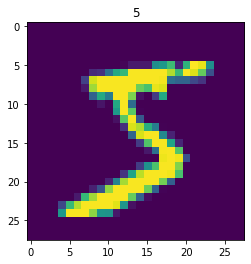

In [7]:
for image, label in mnist_dataset:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:, :,0])
    plt.show()
    break

## Pandas数据读取

In [8]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [11]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

In [12]:
target = df.pop('target')

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [14]:
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


## 从Python generator构建数据管道

In [17]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [18]:
flowers = './flower_photos/flower_photos/'

In [19]:
def Gen():
    gen = img_gen.flow_from_directory(flowers)
    for (x,y) in gen:
        yield (x,y)

In [20]:
ds = tf.data.Dataset.from_generator(
    Gen,
    output_types=(tf.float32, tf.float32)
#     output_shapes=([32,256,256,3], [32,5])
)

In [21]:
for image,label in ds:
    print(image.shape,label.shape)
    break

Found 3670 images belonging to 5 classes.
(32, 256, 256, 3) (32, 5)


# TFRecordDataset类

In [28]:
feature_description = { # 定义Feature结构，告诉解码器每个Feature的类型是什么
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_example(example_string): # 将 TFRecord 文件中的每一个序列化的 tf.train.Example 解码
    feature_dict = tf.io.parse_single_example(example_string, feature_description)
    feature_dict['image'] = tf.io.decode_jpeg(feature_dict['image'])    # 解码JPEG图片
    feature_dict['image'] = tf.image.resize(feature_dict['image'], [256, 256]) / 255.0
    return feature_dict['image'], feature_dict['label']

batch_size = 32

train_dataset = tf.data.TFRecordDataset("sub_train.tfrecords")    # 读取 TFRecord 文件
# filename  label

train_dataset = train_dataset.map(_parse_example)


In [29]:
for image,label in train_dataset:
    print(image,label)
    break

tf.Tensor(
[[[0.7940257  0.64108455 0.3391238 ]
  [0.80168504 0.64874387 0.3467831 ]
  [0.8132659  0.66032475 0.35836396]
  ...
  [0.9532872  0.7964244  0.46309108]
  [0.9428615  0.7938419  0.47619486]
  [0.9352022  0.7861826  0.46853554]]

 [[0.7940257  0.64108455 0.3391238 ]
  [0.80168504 0.64874387 0.3467831 ]
  [0.8132659  0.66032475 0.35836396]
  ...
  [0.95611584 0.7992531  0.46591976]
  [0.9428615  0.7938419  0.47619486]
  [0.9352022  0.7861826  0.46853554]]

 [[0.7940257  0.64108455 0.3391238 ]
  [0.80168504 0.64874387 0.3467831 ]
  [0.8132659  0.66032475 0.35836396]
  ...
  [0.95626533 0.7985458  0.4725622 ]
  [0.94678307 0.79776347 0.48011643]
  [0.93912375 0.79010415 0.4724571 ]]

 ...

 [[0.60059744 0.4790288  0.2162837 ]
  [0.60228246 0.48071384 0.21796875]
  [0.6060202  0.4844516  0.2217065 ]
  ...
  [0.00784314 0.01176471 0.        ]
  [0.00784314 0.01176471 0.        ]
  [0.00784314 0.01176471 0.        ]]

 [[0.59486824 0.47329962 0.21055454]
  [0.5987898  0.4772212  0

# TextLineDataset类

In [30]:
titanic_lines = tf.data.TextLineDataset(['train.csv','eval.csv'])

In [31]:
def data_func(line):
    line = tf.strings.split(line, sep = ",")
    return line

In [32]:
titanic_data = titanic_lines.skip(1).map(data_func)

In [33]:
for line in titanic_data:
    print(line)
    break

tf.Tensor(
[b'0' b'male' b'22.0' b'1' b'0' b'7.25' b'Third' b'unknown' b'Southampton'
 b'n'], shape=(10,), dtype=string)
